___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*

---
---

# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

---
---

# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 3. WordCloud - Repetition of Words

- Collect Words
- Create Word Cloud
- Exploring Vader Sentiment Analyzer

#### 4. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection
- Detect Reviews

#### 5. Implementing Machine Learning Models

- Train - Test Split
- Vectorization
- Oversampling & Undersampling
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- KNN
- Random Forest
- LSTM

---
---

# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

## 1. Exploratory Data Analysis

In [1]:
#Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ecomm_df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
ecomm_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#Droping the Unnamed,Clothing ID, and Title columns as Review Text colum gives a better description of the title.
ecomm_df = ecomm_df.drop(['Unnamed: 0','Clothing ID','Title','Unnamed: 0'],axis=1)
ecomm_df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
ecomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Review Text              22641 non-null  object
 2   Rating                   23486 non-null  int64 
 3   Recommended IND          23486 non-null  int64 
 4   Positive Feedback Count  23486 non-null  int64 
 5   Division Name            23472 non-null  object
 6   Department Name          23472 non-null  object
 7   Class Name               23472 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [5]:
ecomm_df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [6]:
print(f'Lenght of data:  {len(ecomm_df)}')
print("--------------------------------")
print(f'Data Shape:  {ecomm_df.shape}')
print("--------------------------------")
print(f'Lenght of column:  {len(ecomm_df.columns)}')
print("--------------------------------")
print(ecomm_df.dtypes)

Lenght of data:  23486
--------------------------------
Data Shape:  (23486, 8)
--------------------------------
Lenght of column:  8
--------------------------------
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


Review Text gives a better description of the title so the title can be dropped. Also the class names gives a more final classification of the item therefore the others can be dropped.

Sum of Missing Data

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64
--------------------------------
Percentage of missing data

Review Text        3.60
Division Name      0.06
Department Name    0.06
Class Name         0.06
dtype: float64
--------------------------------
PLOT of Missing Data



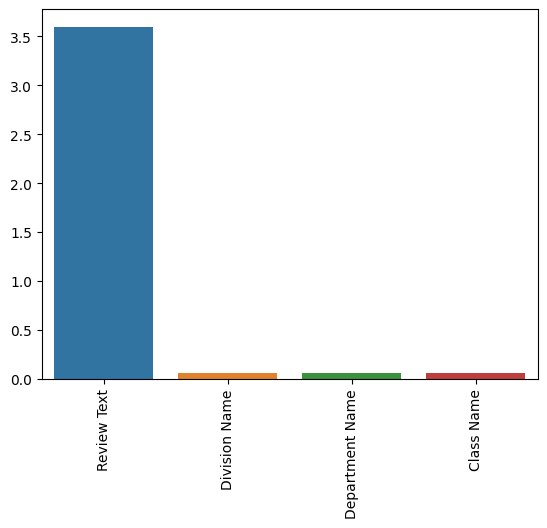

In [7]:
print("Sum of Missing Data\n")
print(ecomm_df.isna().sum())

#Percentage of missing data
per_mis = round(ecomm_df.isna().sum()/len(ecomm_df) * 100, 2).sort_values(ascending=False)
per_mis = per_mis[per_mis >0]
print("--------------------------------")
print("Percentage of missing data\n")
print(per_mis)

print("--------------------------------")
print("PLOT of Missing Data\n")
sns.barplot(x=per_mis.index, y=per_mis)
plt.xticks(rotation=90)
plt.show()

In [8]:
#Explore the missing rows of data to see if the columns missing are all on same row or not
ecomm_df[ecomm_df['Class Name'].isnull()].sample(5)

#This shows Division name, Department Name and Class Names have same rows missing


,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16223,39,These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
21532,43,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN
18671,54,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
18626,34,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
22997,47,"These socks are soft and comfortable, and they...",5,1,1,NaN,NaN,NaN


In [9]:
ecomm_df = ecomm_df.dropna(subset=['Class Name','Review Text'])
print(ecomm_df.isna().sum())

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [10]:
# Before Dublicate Removal
duplicate_count = ecomm_df.duplicated(keep='first').sum()
print(duplicate_count)
print("--------------------------------\n")

duplicates = ecomm_df[ecomm_df.duplicated(keep=False)].iloc[:, :2]
print(duplicates)
print("--------------------------------\n")

# Drop Duplicates
ecomm_df.drop_duplicates(keep='first', inplace=True)

# After Dublicate Removal
duplicate_count = ecomm_df.duplicated(keep='first').sum()
print(duplicate_count)

3
--------------------------------

       Age                                        Review Text
9447    37  Love, love these jeans. being short they come ...
10067   26  Perfect fit and i've gotten so many compliment...
10137   43  I bought this shirt at the store and after goi...
13354   26  Perfect fit and i've gotten so many compliment...
14275   43  I bought this shirt at the store and after goi...
21888   37  Love, love these jeans. being short they come ...
--------------------------------

0


In [11]:
# Description of the numerical columns
ecomm_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,22625.0,43.283934,12.328387,18.0,34.0,41.0,52.0,99.0
Rating,22625.0,4.182983,1.115946,1.0,4.0,5.0,5.0,5.0
Recommended IND,22625.0,0.818740,0.385242,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22625.0,2.632133,5.787824,0.0,0.0,1.0,3.0,122.0


In [12]:
# Description of non numeriacl columns
ecomm_df.describe(include=object).transpose()

,count,unique,top,freq
Review Text,22625,22621,"Lightweight, soft cotton top and shorts. i thi...",2
Division Name,22625,3,General,13364
Department Name,22625,6,Tops,10047
Class Name,22625,20,Dresses,6145


In [13]:
ecomm_df['Positive Feedback Count'].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59])

In [14]:
ecomm_df['Positive Feedback Count'].value_counts()

0      10318
1       4041
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [15]:
# Get the review text length of the messages
ecomm_df['Review_lenght'] =ecomm_df['Review Text'].apply(len)
ecomm_df.sample(5)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review_lenght
16571,43,This dress is fun and flattering. love the pie...,5,1,5,General,Dresses,Dresses,284
6170,57,I love the color and textures of this jacket.\...,4,1,3,General,Tops,Knits,166
9684,23,I wasn't excited enough about this to purchase...,4,1,24,General,Tops,Knits,153
18577,33,Stevie styled ags are my favorite! love the wa...,5,1,0,General,Bottoms,Shorts,110
4568,53,This item states you should wash in cold water...,3,1,0,General,Tops,Blouses,176


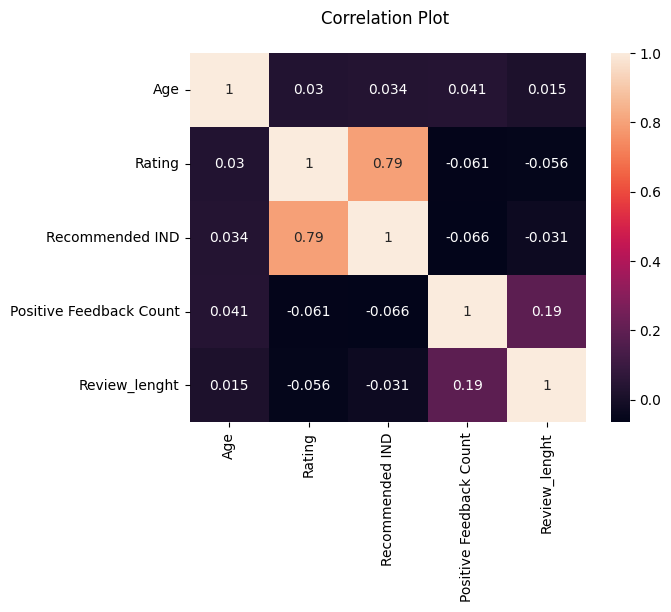

In [16]:
sns.heatmap(ecomm_df.corr(numeric_only= True), annot=True)
plt.title('Correlation Plot \n')
plt.show()

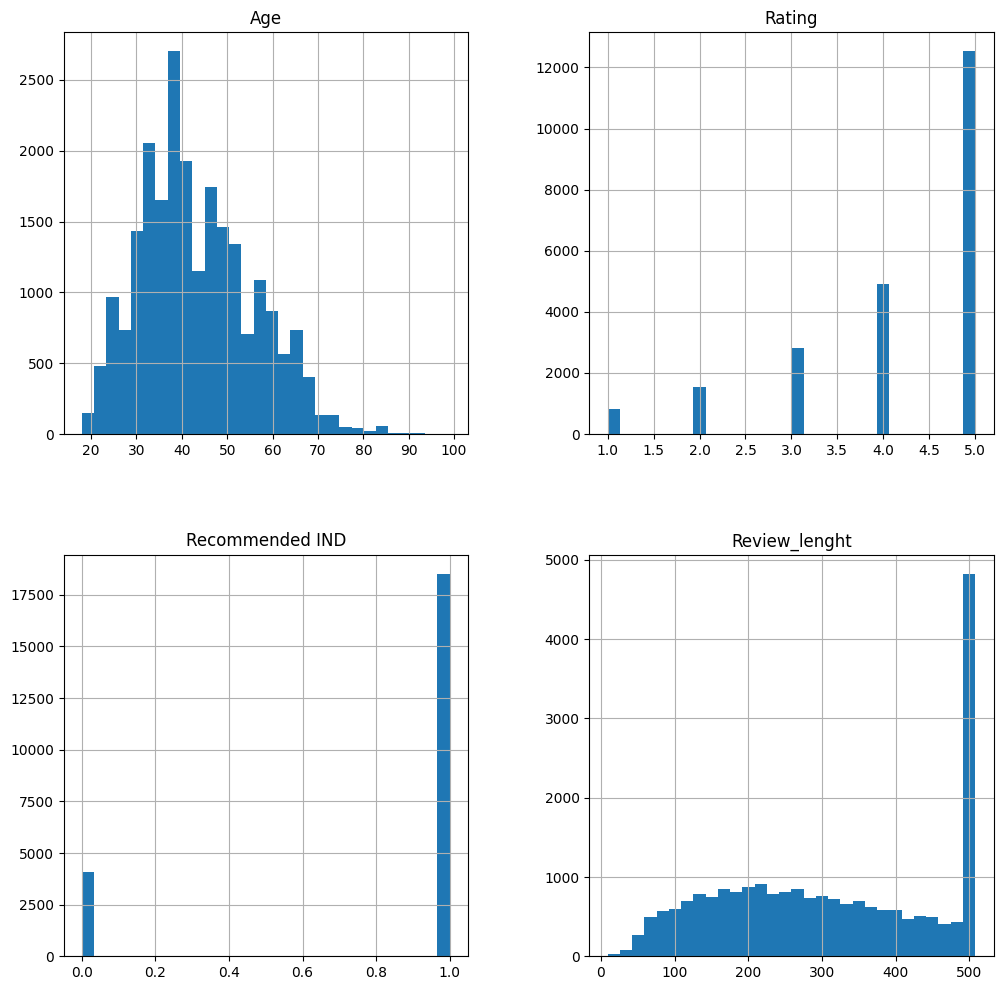

In [17]:
# Explore numerical columns using histplot
ecomm_df = ecomm_df.drop(['Positive Feedback Count'],axis=1)
ecomm_df.hist(figsize=(12, 12), bins=30)
plt.show()

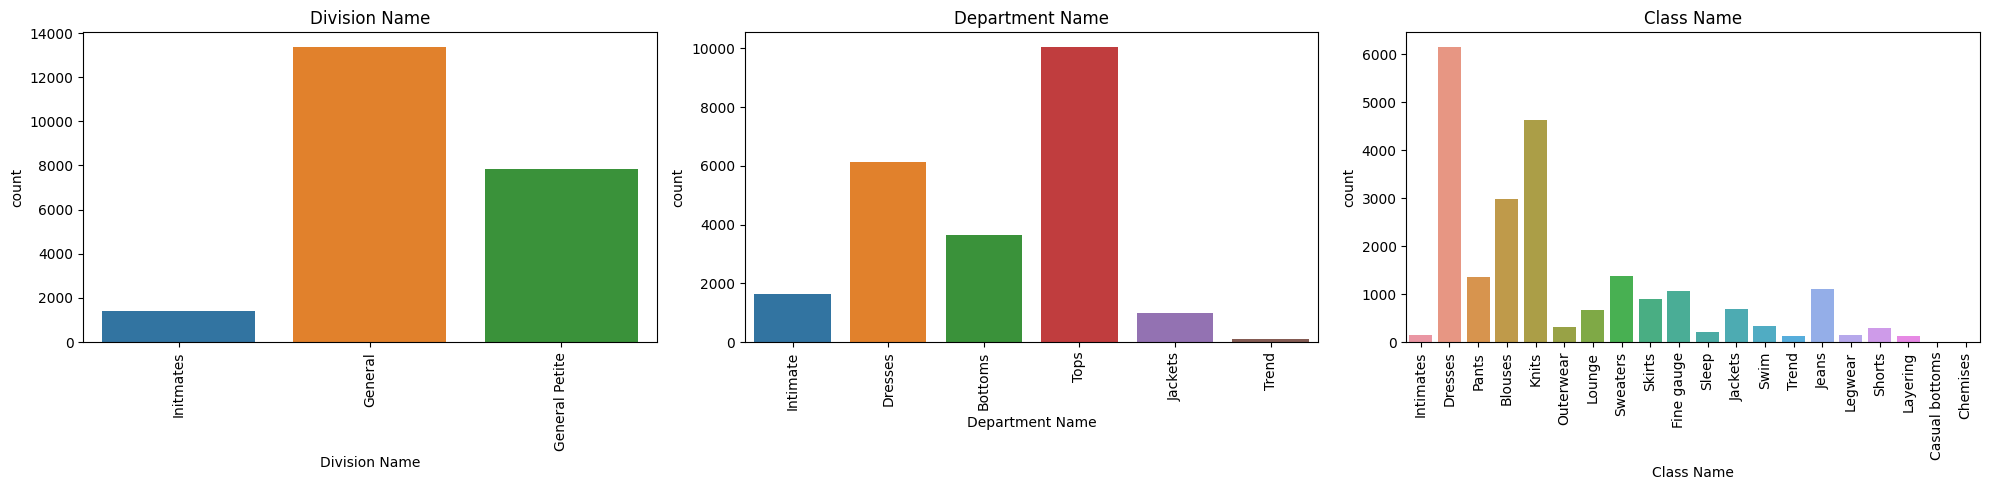

In [18]:
# Explore categorical columns
cols = ["Division Name",	"Department Name",	"Class Name"]
fig, axs = plt.subplots(ncols=len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.countplot(x=col, data=ecomm_df,ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

<Axes: xlabel='Class Name', ylabel='Rating'>

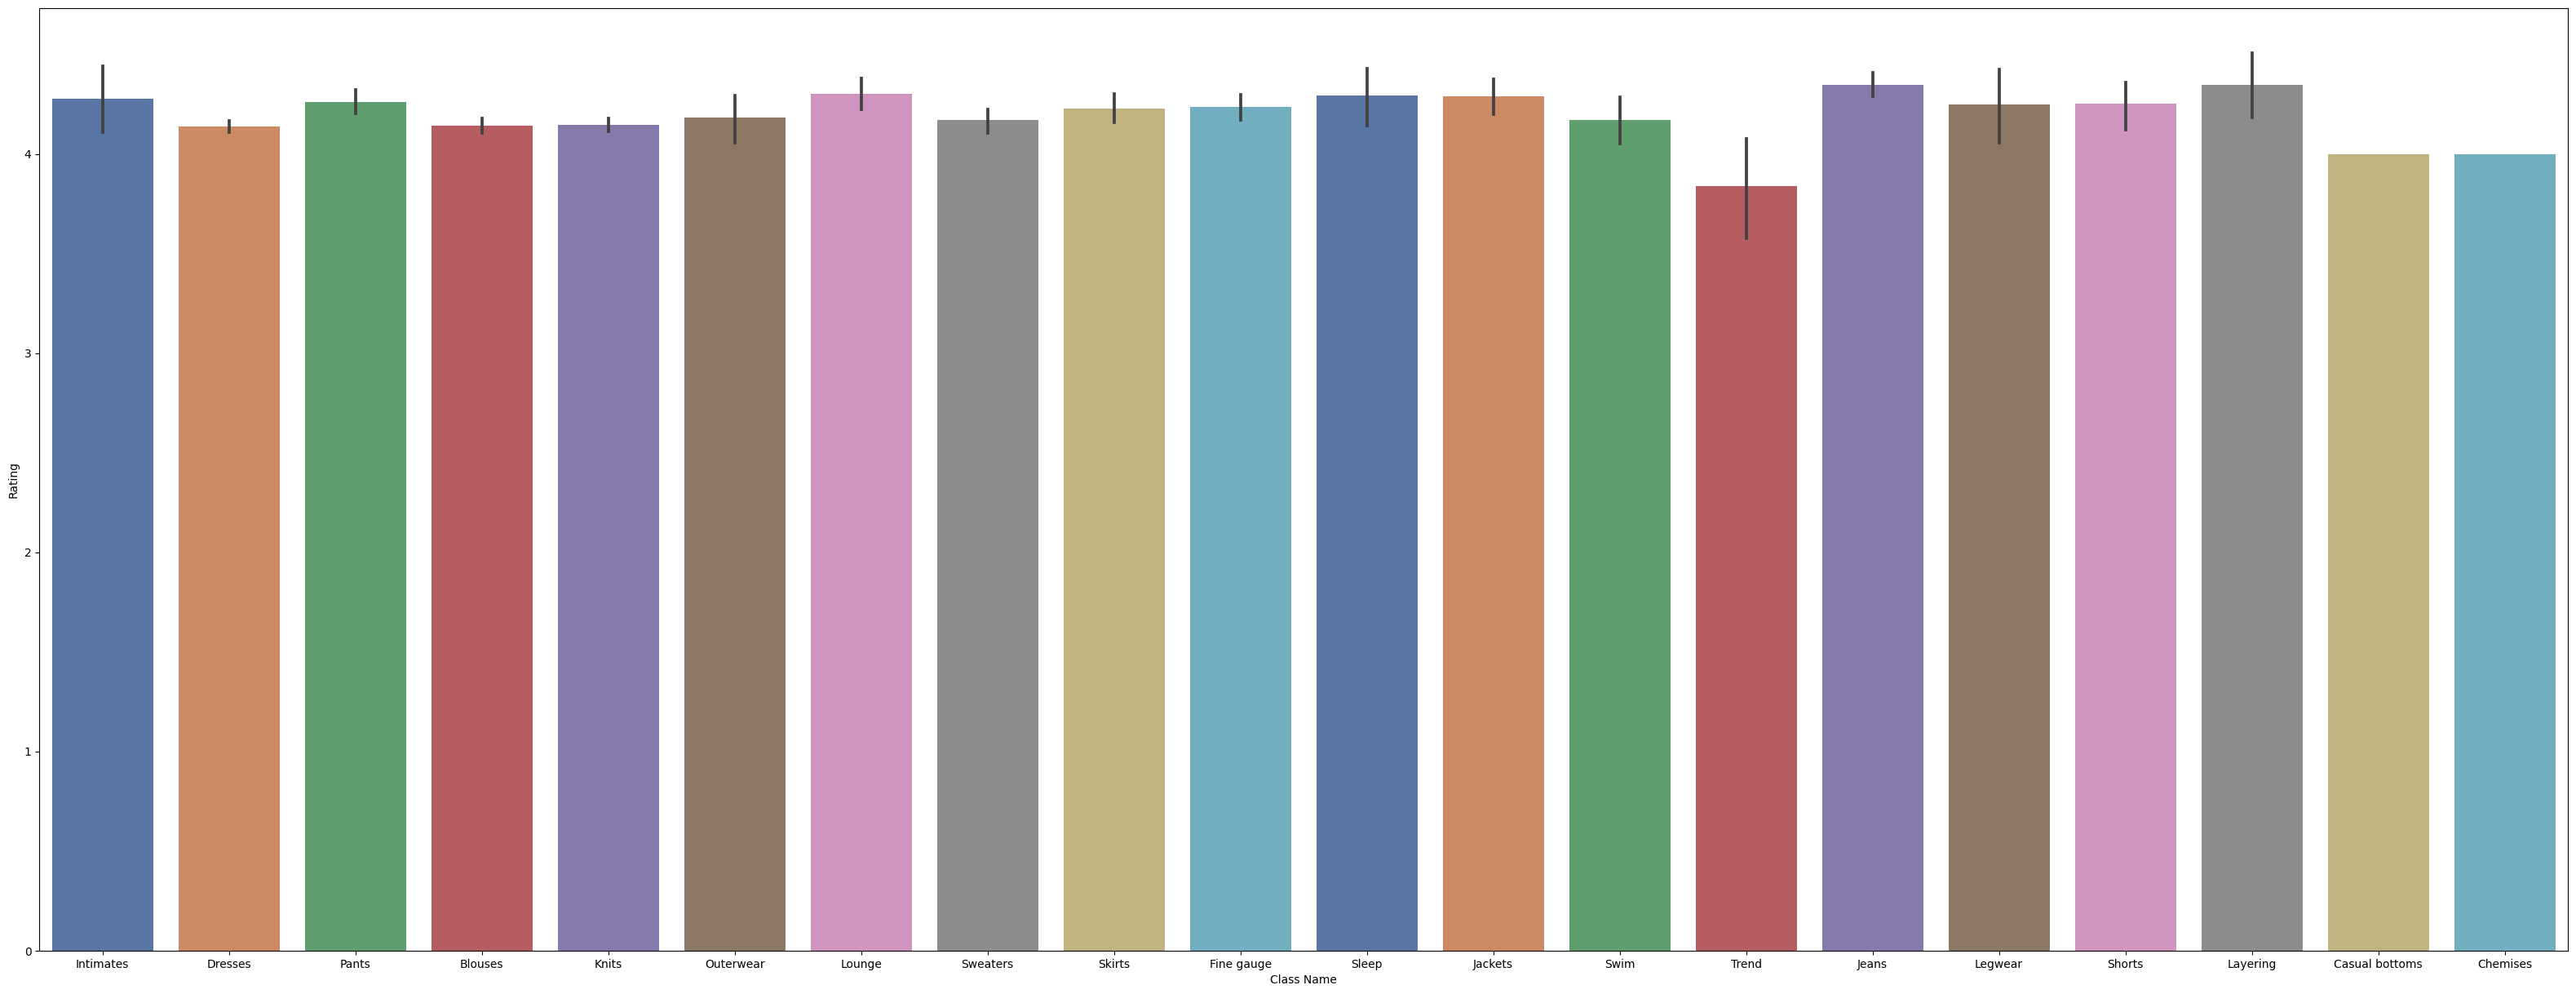

In [19]:
# Explore the ratings of differnt class labels
plt.figure(figsize = (40,15))
sns.barplot(x = 'Class Name', y='Rating', data = ecomm_df, palette = 'deep')

In [20]:
ecomm_df['Review_lenght'].describe()

count    22625.000000
mean       308.774586
std        143.934288
min          9.000000
25%        186.000000
50%        302.000000
75%        459.000000
max        508.000000
Name: Review_lenght, dtype: float64

In [21]:
# Longest message
ecomm_df[ecomm_df['Review_lenght'] == ecomm_df['Review_lenght'].max()]['Review Text'].iloc[0]

'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

In [22]:
# Shortest message
ecomm_df[ecomm_df['Review_lenght'] == ecomm_df['Review_lenght'].min()]['Review Text'].iloc[0]

'Great fit'

## 2. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [24]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [26]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 3. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud

### Detect Reviews (positive and negative separately)

In [27]:
positive_sentences = ecomm_df[ecomm_df["Recommended IND"] == 1]["Review Text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: Review Text, Length: 18524, dtype: object

In [28]:
negative_sentences = ecomm_df[ecomm_df["Recommended IND"] == 0]["Review Text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: Review Text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [29]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [30]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
from wordcloud import WordCloud

In [32]:
wordcloud_positive = WordCloud(background_color="black",
                               max_words =250,
                               scale=3)

In [33]:
wordcloud_positive.generate(positive_words)

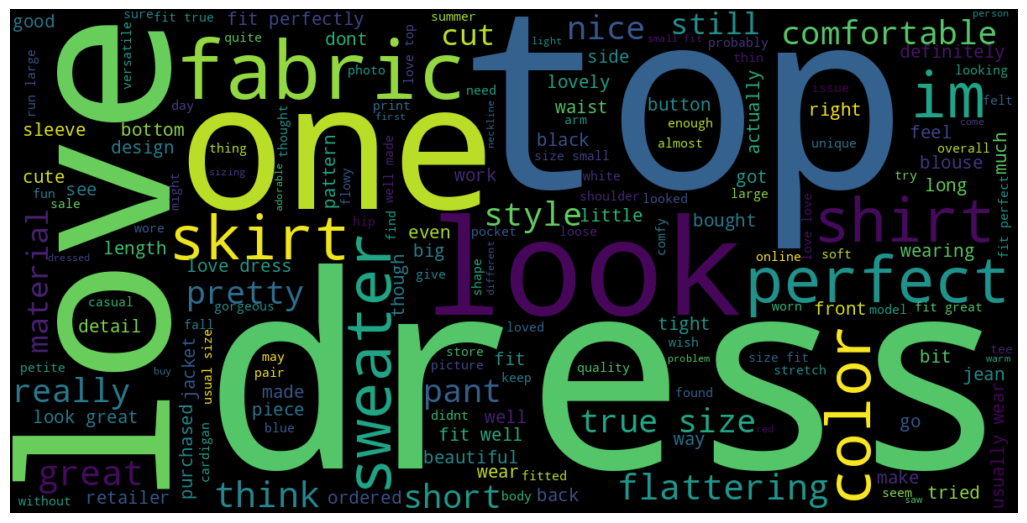

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

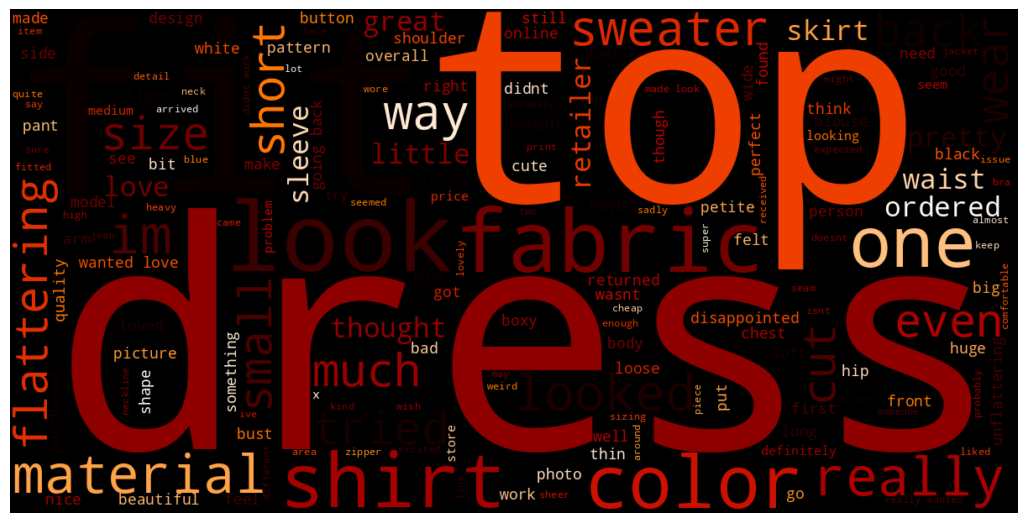

In [35]:
wordcloud_negative = WordCloud(background_color="black",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## Exploring Vader Sentiment Analyzer

In [36]:
pip install vaderSentiment

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


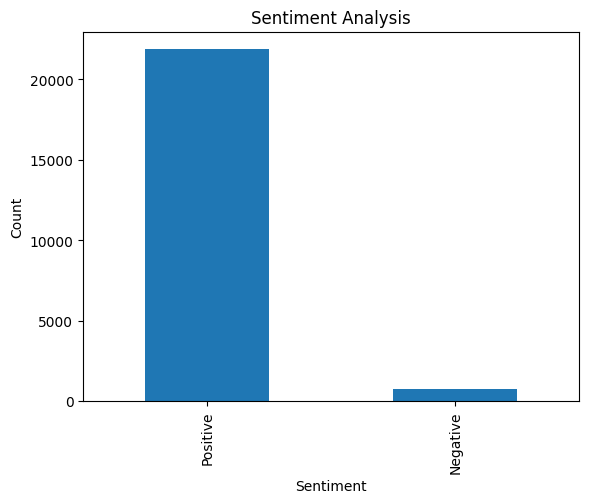

In [38]:
# A copy of the dataset is used here
ecomm_df1 = ecomm_df.copy()

# Clean the text data
def text_processing(text):
    # Remove non-alphabetic characters
    text = re.sub('[^A-Za-z]+', ' ', str(text))

    # Text to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

ecomm_df1['Processed_Text'] = ecomm_df1['Review Text'].copy()

ecomm_df1['Processed_Text'] = ecomm_df1['Processed_Text'].apply(text_processing)

# Perform sentiment analysis using TextBlob and VaderSentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = SentimentIntensityAnalyzer().polarity_scores(text)
    if sentiment['compound'] > 0:
        return ('Positive', sentiment['compound'])
    else:
        return ('Negative', sentiment['compound'])

ecomm_df1[['sentiment', 'compound']] = ecomm_df1['Processed_Text'].apply(get_sentiment).apply(pd.Series)

counts = ecomm_df1['sentiment'].value_counts()
counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [39]:
ecomm_df1[ecomm_df1['sentiment']=='Negative']

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Review_lenght,Processed_Text,sentiment,compound
77,28,The zipper broke on this piece the first time ...,2,0,General Petite,Tops,Blouses,217,zipper broke piece first time wore disappointi...,Negative,-0.2263
104,51,"Runs big and looked unflattering. i am petite,...",2,0,General,Tops,Knits,76,runs big looked unflattering petite might work...,Negative,0.0000
110,44,This is so thin and poor quality. especially f...,1,0,General Petite,Tops,Knits,180,thin poor quality especially price felt like t...,Negative,-0.3892
191,52,I was minimally torn over whether to return th...,2,0,General Petite,Tops,Fine gauge,273,minimally torn whether return ultimately going...,Negative,-0.5456
214,67,The skirt that i received had very little blue...,1,0,General Petite,Bottoms,Skirts,249,skirt received little blue green mostly white ...,Negative,-0.3182
...,...,...,...,...,...,...,...,...,...,...,...
23259,54,So small! i was a solid size 12 in skirts but ...,3,0,General,Bottoms,Skirts,294,small solid size skirts recently lost weight s...,Negative,-0.4215
23305,55,This dress is only suitable for a beach cover-...,3,0,General Petite,Intimate,Lounge,160,dress suitable beach cover completely sheer ex...,Negative,-0.2263
23334,20,I ordered the dress online and found it to be ...,3,1,General,Dresses,Dresses,489,ordered dress online found pictured length hit...,Negative,-0.1935
23457,49,"These pants are soft, fun print and comfy. the...",5,1,General Petite,Intimate,Lounge,169,pants soft fun print comfy drop crotch cut fla...,Negative,-0.1526


In [40]:
# Check the negatively classified reviews
negative_list = ecomm_df1[ecomm_df1['sentiment']=='Negative']['Review Text'][0:5].tolist()
negative_list

["The zipper broke on this piece the first time i wore it. very disappointing since i love the design. i'm actually going to try to replace the zipper myself with something stronger, but annoying that it's come to that.",
 'Runs big and looked unflattering. i am petite, might work on someone taller.',
 'This is so thin and poor quality. especially for the price. it felt like a thin pajama top. the buttons are terrible little shell buttons. this could not have been returned faster.',
 "I was minimally torn over whether to return this but ultimately it's going back because the knit is just too thin. i thought it would be cozy and be of normal sweater weight but it's not. and because it's so light, the swing effect doesn't really come off. nothing special.",
 'The skirt that i received had very little blue or green in it, and was mostly white, yellow and some red. the fit was fine but the quality for the price was not there for me. the lack of quality and the disappointment in the quality

In [41]:
# Check for postive sentiments with ratings below 3
rating_lst2 = ecomm_df1[(ecomm_df1['sentiment']=='Positive') & (ecomm_df1['Rating'] <= 3)]['Review Text'][5:10].tolist()
rating_lst2

["First of all, this is not pullover styling. there is a side zipper. i wouldn't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me.\n\nsecond of all, the tulle feels and looks cheap and the slip has an awkward tight shape underneath.\n\nnot at all what is looks like or is described as. sadly will be returning, but i'm sure i will find something to exchange it for!",
 "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured.",
 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans',
 

<Axes: xlabel='Rating', ylabel='count'>

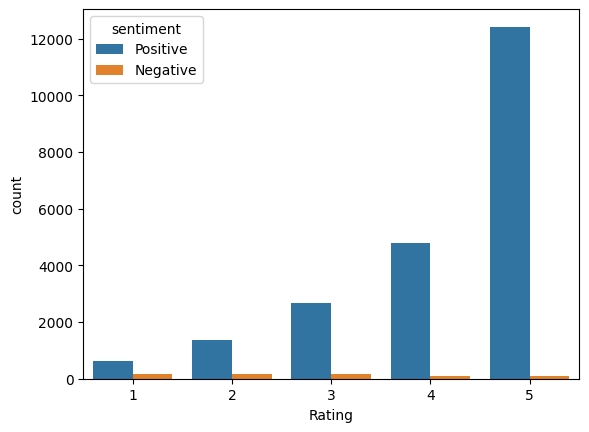

In [42]:
sns.countplot(data = ecomm_df1, x = 'Rating',hue= 'sentiment')

From this analysis, it can be seen that positive sentiments were spread for all the ratings. It is most likely for a rating less than three to have mainly negative sentiments. The Review text comments were reviewd for both negatively  and positevely classified sentiment and it was seen above that for ratings less that three the comments were mainly negative but the vader analyzer classified tem as positive. This makes the vader analyzer not an accurate method for classifying this dataset. The recommneded ind column will be reviewed below for sentiment classification.

In [43]:
counts = ecomm_df['Recommended IND'].value_counts()
print(counts)

1    18524
0     4101
Name: Recommended IND, dtype: int64


In [44]:
ecomm_df[ecomm_df['Recommended IND']==0][['Review Text',	'Rating']][0:10]

,Review Text,Rating
2,I had such high hopes for this dress and reall...,3
5,"I love tracy reese dresses, but this one is no...",2
10,Dress runs small esp where the zipper area run...,3
22,"First of all, this is not pullover styling. th...",2
25,"Loved the material, but i didnt really look at...",3
26,I have been waiting for this sweater coat to s...,2
33,"I ordered this 3 months ago, and it finally ca...",2
56,I am pregnant and i thought this would be a gr...,2
57,This tank fit well and i loved the ruffle in t...,3
61,"3 tags sewn in, 2 small (about 1'' long) and 1...",1


In [45]:
# Check the 0 recommended reviews
not_reccomend_list = ecomm_df[ecomm_df['Recommended IND']==0]['Review Text'][5:15].tolist()
not_reccomend_list

["I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat. the sleeves are very wide (although long). as a light weight fall coat the sleeves don't need to be as wide because you wouldn't be layerng too much underneath. the buttons need to be moved at least three inches in for a nicer fit. i thought about redoing the buttons myself but the sleeves looked even more out of proportion with a tigh",
 'I ordered this 3 months ago, and it finally came off back order. a huge disappointment. the fit wasn&#39;t so much the issue for me. the quality of the wool is subpar. someone else mentioned a &quot;felted wool&quot;...i guess, is that what you call it?  it does literally feel like felt! super thin, itchy, doesn&#39;t drape very well, and feels cheap (made in china). i got it on sale, but still not worth what i paid. definitely going back.',
 "I am pregnant and i thought this would be a g

In [46]:
# Replace 1 with positive and 0 with negative
ecomm_df['Recommended IND'] = ecomm_df['Recommended IND'].replace({0: 'Negative', 1: 'Positive'})

In [47]:
ecomm_df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Review_lenght
0,33,Absolutely wonderful - silky and sexy and comf...,4,Positive,Initmates,Intimate,Intimates,53
1,34,Love this dress! it's sooo pretty. i happene...,5,Positive,General,Dresses,Dresses,303
2,60,I had such high hopes for this dress and reall...,3,Negative,General,Dresses,Dresses,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,Positive,General Petite,Bottoms,Pants,124
4,47,This shirt is very flattering to all due to th...,5,Positive,General,Tops,Blouses,192


In [48]:
#ecomm_df.groupby(['Rating', 'Recommended IND']).describe()
ecomm_df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].value_counts()

Rating  Recommended IND  Recommended IND
1       Negative         Negative             806
        Positive         Positive              15
2       Negative         Negative            1455
        Positive         Positive              94
3       Negative         Negative            1653
        Positive         Positive            1170
4       Negative         Negative             164
        Positive         Positive            4744
5       Negative         Negative              23
        Positive         Positive           12501
Name: Recommended IND, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

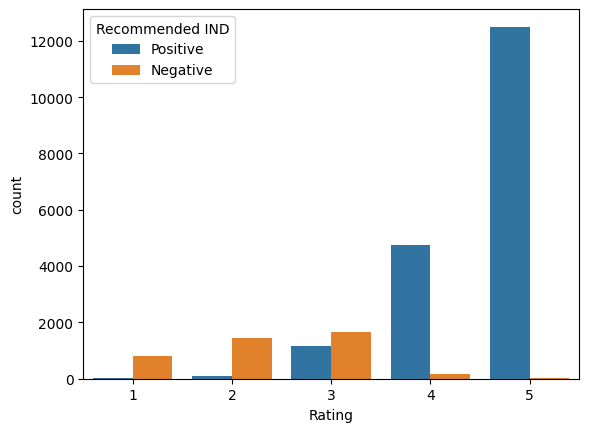

In [49]:
sns.countplot(data = ecomm_df, x = 'Rating',hue= 'Recommended IND')

From this analysis, it can be seen that not recommended holds a true position of the sentiments with 0 being mostly a bad review and 1 being a positive review. This column will be used as the basis for training our machine learning model.

## 4. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.

In [50]:
def text_processing(text):
    # Remove non-alphabetic characters
    text = re.sub('[^A-Za-z]+', ' ', str(text))

    # Convert text to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

ecomm_df['Processed_Text'] = ecomm_df['Review Text'].copy()

ecomm_df['Processed_Text'] = ecomm_df['Processed_Text'].apply(text_processing)

In [51]:
ecomm_df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Review_lenght,Processed_Text
0,33,Absolutely wonderful - silky and sexy and comf...,4,Positive,Initmates,Intimate,Intimates,53,absolutely wonderful silky sexy comfortable
1,34,Love this dress! it's sooo pretty. i happene...,5,Positive,General,Dresses,Dresses,303,love dress sooo pretty happened find store gla...
2,60,I had such high hopes for this dress and reall...,3,Negative,General,Dresses,Dresses,500,high hopes dress really wanted work initially ...
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,Positive,General Petite,Bottoms,Pants,124,love love love jumpsuit fun flirty fabulous ev...
4,47,This shirt is very flattering to all due to th...,5,Positive,General,Tops,Blouses,192,shirt flattering due adjustable front tie perf...


## 5. Implementing Machine Learning Models Using Train/Test Split
Below are the algorithms used

1.   Logistic regression
2.   Random Forest
3.   Naive Bayes
4.   KNN
5.   SVM
6.   LSTM



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# Define the list of models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=100000)),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Naive Bayes", MultinomialNB())
]

In [53]:
# Split the dataset into training and testing sets
X = ecomm_df['Processed_Text']
y = ecomm_df['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features from text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Loop through each model to train, predict, and evaluate
for name, model_tts in models:
    start_time = time.time() # start time

    #model training
    model_tts.fit(X_train_vec, y_train)

    # Make predictions on the testing set
    y_pred = model_tts.predict(X_test_vec)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution tims(s)

    # Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")


Model: Logistic Regression
Accuracy: 0.8875138121546962
Confusion Matrix:
[[ 485  326]
 [ 183 3531]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66       811
    Positive       0.92      0.95      0.93      3714

    accuracy                           0.89      4525
   macro avg       0.82      0.77      0.79      4525
weighted avg       0.88      0.89      0.88      4525


Execution time: 1.20 seconds
-------------------------------------------------

Model: SVM
Accuracy: 0.8943646408839779
Confusion Matrix:
[[ 441  370]
 [ 108 3606]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.54      0.65       811
    Positive       0.91      0.97      0.94      3714

    accuracy                           0.89      4525
   macro avg       0.86      0.76      0.79      4525
weighted avg       0.89      0.89      0.89      4525


Execution time: 92.58 seconds
--

Evaluation Metrics Tabulation

In [54]:
results = []
for name, model_tts in models:
    start_time = time.time()
    model_tts.fit(X_train_vec, y_train)
    y_pred = model_tts.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred).ravel()
    tn, fp, fn, tp = confusion_mat
    specificity = tn / (tn + fp)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    end_time = time.time()
    execution_time = end_time - start_time # Execution tims(s)
    result = {'Model': name, 'Accuracy': accuracy, 'Specificity': specificity, 'Execution Time (s)': execution_time}
    result.update({'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})
    result.update(classification_rep['macro avg'])
    results.append(result)

# Create a DataFrame from the results
result_tts = pd.DataFrame(results)
result_tts


,Model,Accuracy,Specificity,Execution Time (s),TN,FP,FN,TP,precision,recall,f1-score,support
0,Logistic Regression,0.887514,0.598027,1.122289,485,326,183,3531,0.820763,0.774377,0.794309,4525
1,SVM,0.894365,0.543773,79.222762,441,370,108,3606,0.855110,0.757347,0.793185,4525
2,Random Forest,0.864530,0.271270,13.142627,220,591,22,3692,0.885552,0.632673,0.670600,4525
3,KNN,0.824309,0.131936,3.134772,107,704,91,3623,0.688852,0.553717,0.556611,4525
4,Naive Bayes,0.895028,0.681874,0.144764,553,258,217,3497,0.824737,0.811723,0.817981,4525


Model Testing

In [55]:
# New text data
unseen_text =["Sadly, i will have to return this",'Not what i wanted', 'I love the dress','Disappointed with this']
# text transform
unseen_text_vec = vectorizer.transform(unseen_text)

# Make predictions
for name, model_tts in models:
  unseen_text_pred = model_tts.predict(unseen_text_vec)

# Print predictions
  for i, text in enumerate(unseen_text):
    print("New Text Predictions", i+1, ":", unseen_text_pred[i])
  print(f"Model: {name}")
  print(f"-------------------------------------------------\n")

New Text Predictions 1 : Positive
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Logistic Regression
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: SVM
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Random Forest
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Positive
Model: KNN
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Naive Bayes
---------------------------

## Implementing Machine Learning Models Using Cross Validation

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

X = ecomm_df['Processed_Text']
y = ecomm_df['Recommended IND']
# Extract features from text data using CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)


# Set up k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model to train, predict, and evaluate with cross-validation
for name, model_cv in models:
    start_time = time.time() # start time

    # Fit the model on the training data
    model_cv.fit(X_vec, y)

    # Make cross-validated predictions
    y_pred = cross_val_predict(model_cv, X_vec, y, cv =cv)

    # Evaluate the model
    accuracy = accuracy_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution tims(s)

    # Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")


Model: Logistic Regression
Accuracy: 0.886939226519337
Confusion Matrix:
[[ 2492  1609]
 [  949 17575]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.61      0.66      4101
    Positive       0.92      0.95      0.93     18524

    accuracy                           0.89     22625
   macro avg       0.82      0.78      0.80     22625
weighted avg       0.88      0.89      0.88     22625


Execution time: 8.98 seconds
-------------------------------------------------

Model: SVM
Accuracy: 0.8896795580110497
Confusion Matrix:
[[ 2142  1959]
 [  537 17987]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.52      0.63      4101
    Positive       0.90      0.97      0.94     18524

    accuracy                           0.89     22625
   macro avg       0.85      0.75      0.78     22625
weighted avg       0.88      0.89      0.88     22625


Execution time: 516.40 se



Evaluation Metrics Tabulation



In [57]:
# Train, predict, and evaluate each model
# Set up k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, model_cv in models:
    start_time = time.time()
    y_pred = cross_val_predict(model_cv, X_vec, y, cv =cv)

    # Evaluate the model
    accuracy = accuracy_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred).ravel()
    tn, fp, fn, tp = confusion_mat
    specificity = tn / (tn + fp)
    classification_rep = classification_report(y, y_pred, output_dict=True)
    end_time = time.time()
    execution_time = end_time - start_time # Execution tims(s)
    result = {'Model': name, 'Accuracy': accuracy, 'Specificity': specificity, 'Execution Time (s)': execution_time}
    result.update({'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})
    result.update(classification_rep['macro avg'])
    results.append(result)


result_cv = pd.DataFrame(results)
result_cv


,Model,Accuracy,Specificity,Execution Time (s),TN,FP,FN,TP,precision,recall,f1-score,support
0,Logistic Regression,0.886939,0.607657,8.077010,2492,1609,949,17575,0.820168,0.778213,0.796498,22625
1,SVM,0.889680,0.522312,435.425618,2142,1959,537,17987,0.850668,0.746661,0.783488,22625
2,Random Forest,0.857459,0.247744,104.642832,1016,3085,140,18384,0.867599,0.620093,0.652947,22625
3,KNN,0.820022,0.131919,15.520801,541,3560,512,18012,0.674371,0.552140,0.554189,22625
4,Naive Bayes,0.887646,0.686418,0.824959,2815,1286,1256,17268,0.811083,0.809307,0.810190,22625


Cross Validation Model Testing



In [58]:
# New and unseen data
unseen_text = ["Sadly, i will have to return this",'Not what i wanted', 'I love the dress','Disappointed with this']

# data transform
unseen_text_vec = vectorizer.transform(unseen_text)

# Make predictions
for name, model_cv in models:
  unseen_text_pred = model_cv.predict(unseen_text_vec)

# Print predictions
  for i, text in enumerate(unseen_text):
    print("New Text Predictions", i+1, ":", unseen_text_pred[i])
  print(f"Model: {name}")
  print(f"-------------------------------------------------\n")

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Logistic Regression
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: SVM
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Random Forest
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Positive
Model: KNN
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Naive Bayes
---------------------------

## Implementing Machine Learning Models After Oversampling

In [59]:
# Perform oversampling on the training set
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and testing sets
X = ecomm_df['Processed_Text'].values
y = ecomm_df['Recommended IND']


# Split the dataset into train nad test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the ros on training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.reshape(-1, 1), y_train)

# Apply CountVectorizer to the training data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_resampled.squeeze())
X_test_vec = vectorizer.transform(X_test)

# Loop through each model to train, predict, and evaluate
for name, model_ros in models:
    start_time = time.time() # start time
    #model training
    model_ros.fit(X_train_vec, y_train_resampled)

    # Make predictions on the testing set
    y_pred = model_ros.predict(X_test_vec)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution tims(s)

    # Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")


Model: Logistic Regression
Accuracy: 0.870939226519337
Confusion Matrix:
[[ 604  207]
 [ 377 3337]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.74      0.67       811
    Positive       0.94      0.90      0.92      3714

    accuracy                           0.87      4525
   macro avg       0.78      0.82      0.80      4525
weighted avg       0.88      0.87      0.88      4525


Execution time: 3.68 seconds
-------------------------------------------------

Model: SVM
Accuracy: 0.8919337016574586
Confusion Matrix:
[[ 548  263]
 [ 226 3488]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.68      0.69       811
    Positive       0.93      0.94      0.93      3714

    accuracy                           0.89      4525
   macro avg       0.82      0.81      0.81      4525
weighted avg       0.89      0.89      0.89      4525


Execution time: 261.11 seconds
--

Evaluation Metrics Representation

In [60]:
# Train, predict, and evaluate each model
results = []
for name, model_ros in models:
    start_time = time.time()
    model_ros.fit(X_train_vec, y_train_resampled)
    y_pred = model_ros.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred).ravel()
    tn, fp, fn, tp = confusion_mat
    specificity = tn / (tn + fp)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    end_time = time.time()
    execution_time = end_time - start_time # Execution tims(s)
    result = {'Model': name, 'Accuracy': accuracy, 'Specificity': specificity, 'Execution Time (s)': execution_time}
    result.update({'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})
    result.update(classification_rep['macro avg'])
    results.append(result)

result_os = pd.DataFrame(results)
result_os


,Model,Accuracy,Specificity,Execution Time (s),TN,FP,FN,TP,precision,recall,f1-score,support
0,Logistic Regression,0.870939,0.744760,2.659310,604,207,377,3337,0.778645,0.821626,0.796822,4525
1,SVM,0.891934,0.675709,262.653094,548,263,226,3488,0.818948,0.807429,0.812988,4525
2,Random Forest,0.880663,0.443896,24.498856,360,451,89,3625,0.845567,0.709967,0.751054,4525
3,KNN,0.802873,0.286067,5.322966,232,579,313,3401,0.640105,0.600895,0.613124,4525
4,Naive Bayes,0.864088,0.838471,0.169283,680,131,484,3230,0.772608,0.854077,0.800841,4525


Oversampled Model Testing




In [61]:
# New and unseen data
["Sadly, i will have to return this",'Not what i wanted', 'I love the dress','Disappointed with this']
# Text transform
unseen_text_vec = vectorizer.transform(unseen_text)

for name, model_ros in models:
  unseen_text_pred = model_ros.predict(unseen_text_vec)

# Print the predictions for each text
  for i, text in enumerate(unseen_text):
    print("New Text Predictions", i+1, ":", unseen_text_pred[i])
  print(f"Model: {name}")
  print(f"-------------------------------------------------\n")

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Logistic Regression
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: SVM
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Random Forest
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Positive
New Text Predictions 3 : Positive
New Text Predictions 4 : Positive
Model: KNN
-------------------------------------------------

New Text Predictions 1 : Negative
New Text Predictions 2 : Negative
New Text Predictions 3 : Positive
New Text Predictions 4 : Negative
Model: Naive Bayes
---------------------------

## Implementing LSTM Neural Network Model

In [62]:
from nltk.tokenize import word_tokenize
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [63]:
# Prepare the target variable
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Define a mapping from string values to integers
mapping = {'Positive': 1, 'Negative': 0}

# Apply the mapping to the target variable
Y = ecomm_df['Recommended IND'].apply(lambda x: mapping[x])

# Convert the target variable to a one-hot encoded matrix
Y = to_categorical(Y, num_classes=2)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(ecomm_df['Processed_Text'].values)

X = tokenizer.texts_to_sequences(ecomm_df['Processed_Text'].values)
X = pad_sequences(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the neural network architecture
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 128, input_length=X.shape[1]))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(2, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

#model training
start_time = time.time()
model_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=64, callbacks=[early_stop, checkpoint])

# Load the best model
model_lstm.load_weights('best_model.h5')

# Test the model
Y_pred = model_lstm.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(Y_test, axis=1)

confusion_mat = confusion_matrix(Y_test, Y_pred).ravel()
tn, fp, fn, tp = confusion_mat
specificity = tn / (tn + fp)
end_time = time.time()
execution_time = end_time - start_time # Execution tims(s)
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))
print('Classification Report:', classification_report(Y_test, Y_pred))
print('Specificity:', specificity)
print("Execution time: %.2f seconds" % execution_time)

Epoch 1/20
283/283 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8628
Epoch 1: val_loss improved from inf to 0.26372, saving model to best_model.h5
283/283 [==============================] - 48s 155ms/step - loss: 0.3154 - accuracy: 0.8628 - val_loss: 0.2637 - val_accuracy: 0.8844
Epoch 2/20
  1/283 [..............................] - ETA: 38s - loss: 0.2088 - accuracy: 0.9219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


283/283 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9125
Epoch 2: val_loss did not improve from 0.26372
283/283 [==============================] - 44s 154ms/step - loss: 0.2102 - accuracy: 0.9125 - val_loss: 0.2706 - val_accuracy: 0.8952
Epoch 3/20
283/283 [==============================] - ETA: 0s - loss: 0.1686 - accuracy: 0.9306
Epoch 3: val_loss did not improve from 0.26372
283/283 [==============================] - 46s 164ms/step - loss: 0.1686 - accuracy: 0.9306 - val_loss: 0.2893 - val_accuracy: 0.8822
Epoch 4/20
283/283 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9481
Epoch 4: val_loss did not improve from 0.26372
283/283 [==============================] - 45s 158ms/step - loss: 0.1344 - accuracy: 0.9481 - val_loss: 0.3268 - val_accuracy: 0.8729
Epoch 4: early stopping
142/142 [==============================] - 3s 21ms/step
Accuracy: 0.8844198895027624
Confusion Matrix: [[ 581  230]
 [ 293 3421]]
Classification Report:    

LSTM Model Testing

In [64]:
unseen_text = ["Sadly, i will have to return this",'Not what i wanted', 'I love the dress','Disappointed with this']
max_len = max([len(seq) for seq in X])

# tokenize
unseen_text_seq = tokenizer.texts_to_sequences(unseen_text)

# Sequence Padding
unseen_text_padded = pad_sequences(unseen_text_seq, maxlen=max_len)

# Make predictions
unseen_text_pred = model_lstm.predict(unseen_text_padded)

# Print predictions
for i, text in enumerate(unseen_text):
    pred_label = np.argmax(unseen_text_pred[i])
    if pred_label == 0:
        print(f"New Text Predictions {i+1}: Negative")
    else:
        print(f"New Text Predictions {i+1}: Positive")


1/1 [==============================] - 0s 23ms/step
New Text Predictions 1: Negative
New Text Predictions 2: Negative
New Text Predictions 3: Positive
New Text Predictions 4: Negative


### Conclusion
From above, rule based approch which is the vader sentiment analyzer could not accurately classify the columns. The recommended IND column which showed a better classification of the sentiments was used for trainingthe machine learning models. SVM, NB, LR, and the LSTM model showed to be good models for classifying this dataset. Random forest did better when the dataset was oversampled to minimize the data bias in labeled class. I decided to use this approch without using BERT due to a lot of training problems and to implement a unique solution of my own.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___